   #              Linear Regression Assignment

In [306]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns',100)
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [321]:
# Reading the data in to dataframe
df = pd.read_csv(r'E:\DataScience\PGDM\LinearRegressionCode\LinearRegressionAssignment\CarPrice_Assignment.csv')

In [322]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [323]:
# As per the instruction we have to extract the first string only as a CarName
df['CarName'] = df['CarName'].str.split(' ',expand=True)[0]

In [324]:
# Let's see the head of the dataframe now
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [325]:
# Checking unique categories of CarName
df['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
maxda           2
vw              2
renault         2
mercury         1
porcshce        1
vokswagen       1
Nissan          1
toyouta         1
Name: CarName, dtype: int64

From the above results we can see that there are few spelling mistakes

- toyota  and   toyouta
- nissan  and    Nissan
- mazda   and    maxda
- volkswagen and  vokswagen
- porsche and    porcshce

The above all are same, so we will merge them.

In [329]:
# Spelling correction of CarName values
df['CarName'] = df['CarName'].replace({'toyouta':'toyota','Nissan':'nissan','maxda':'mazda','vokswagen':'volkswagen','porcshce':'porsche'})

In [331]:
# Let's cross check the value counts for CarName variable
df['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen     10
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
renault         2
mercury         1
Name: CarName, dtype: int64

In [330]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [332]:
# Droppin car_ID column as it is a unique identification column not useful for our analysis 
df = df.drop('car_ID',axis=1)

In [333]:
# Checking the missing values from the dataset
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Visualizing the data

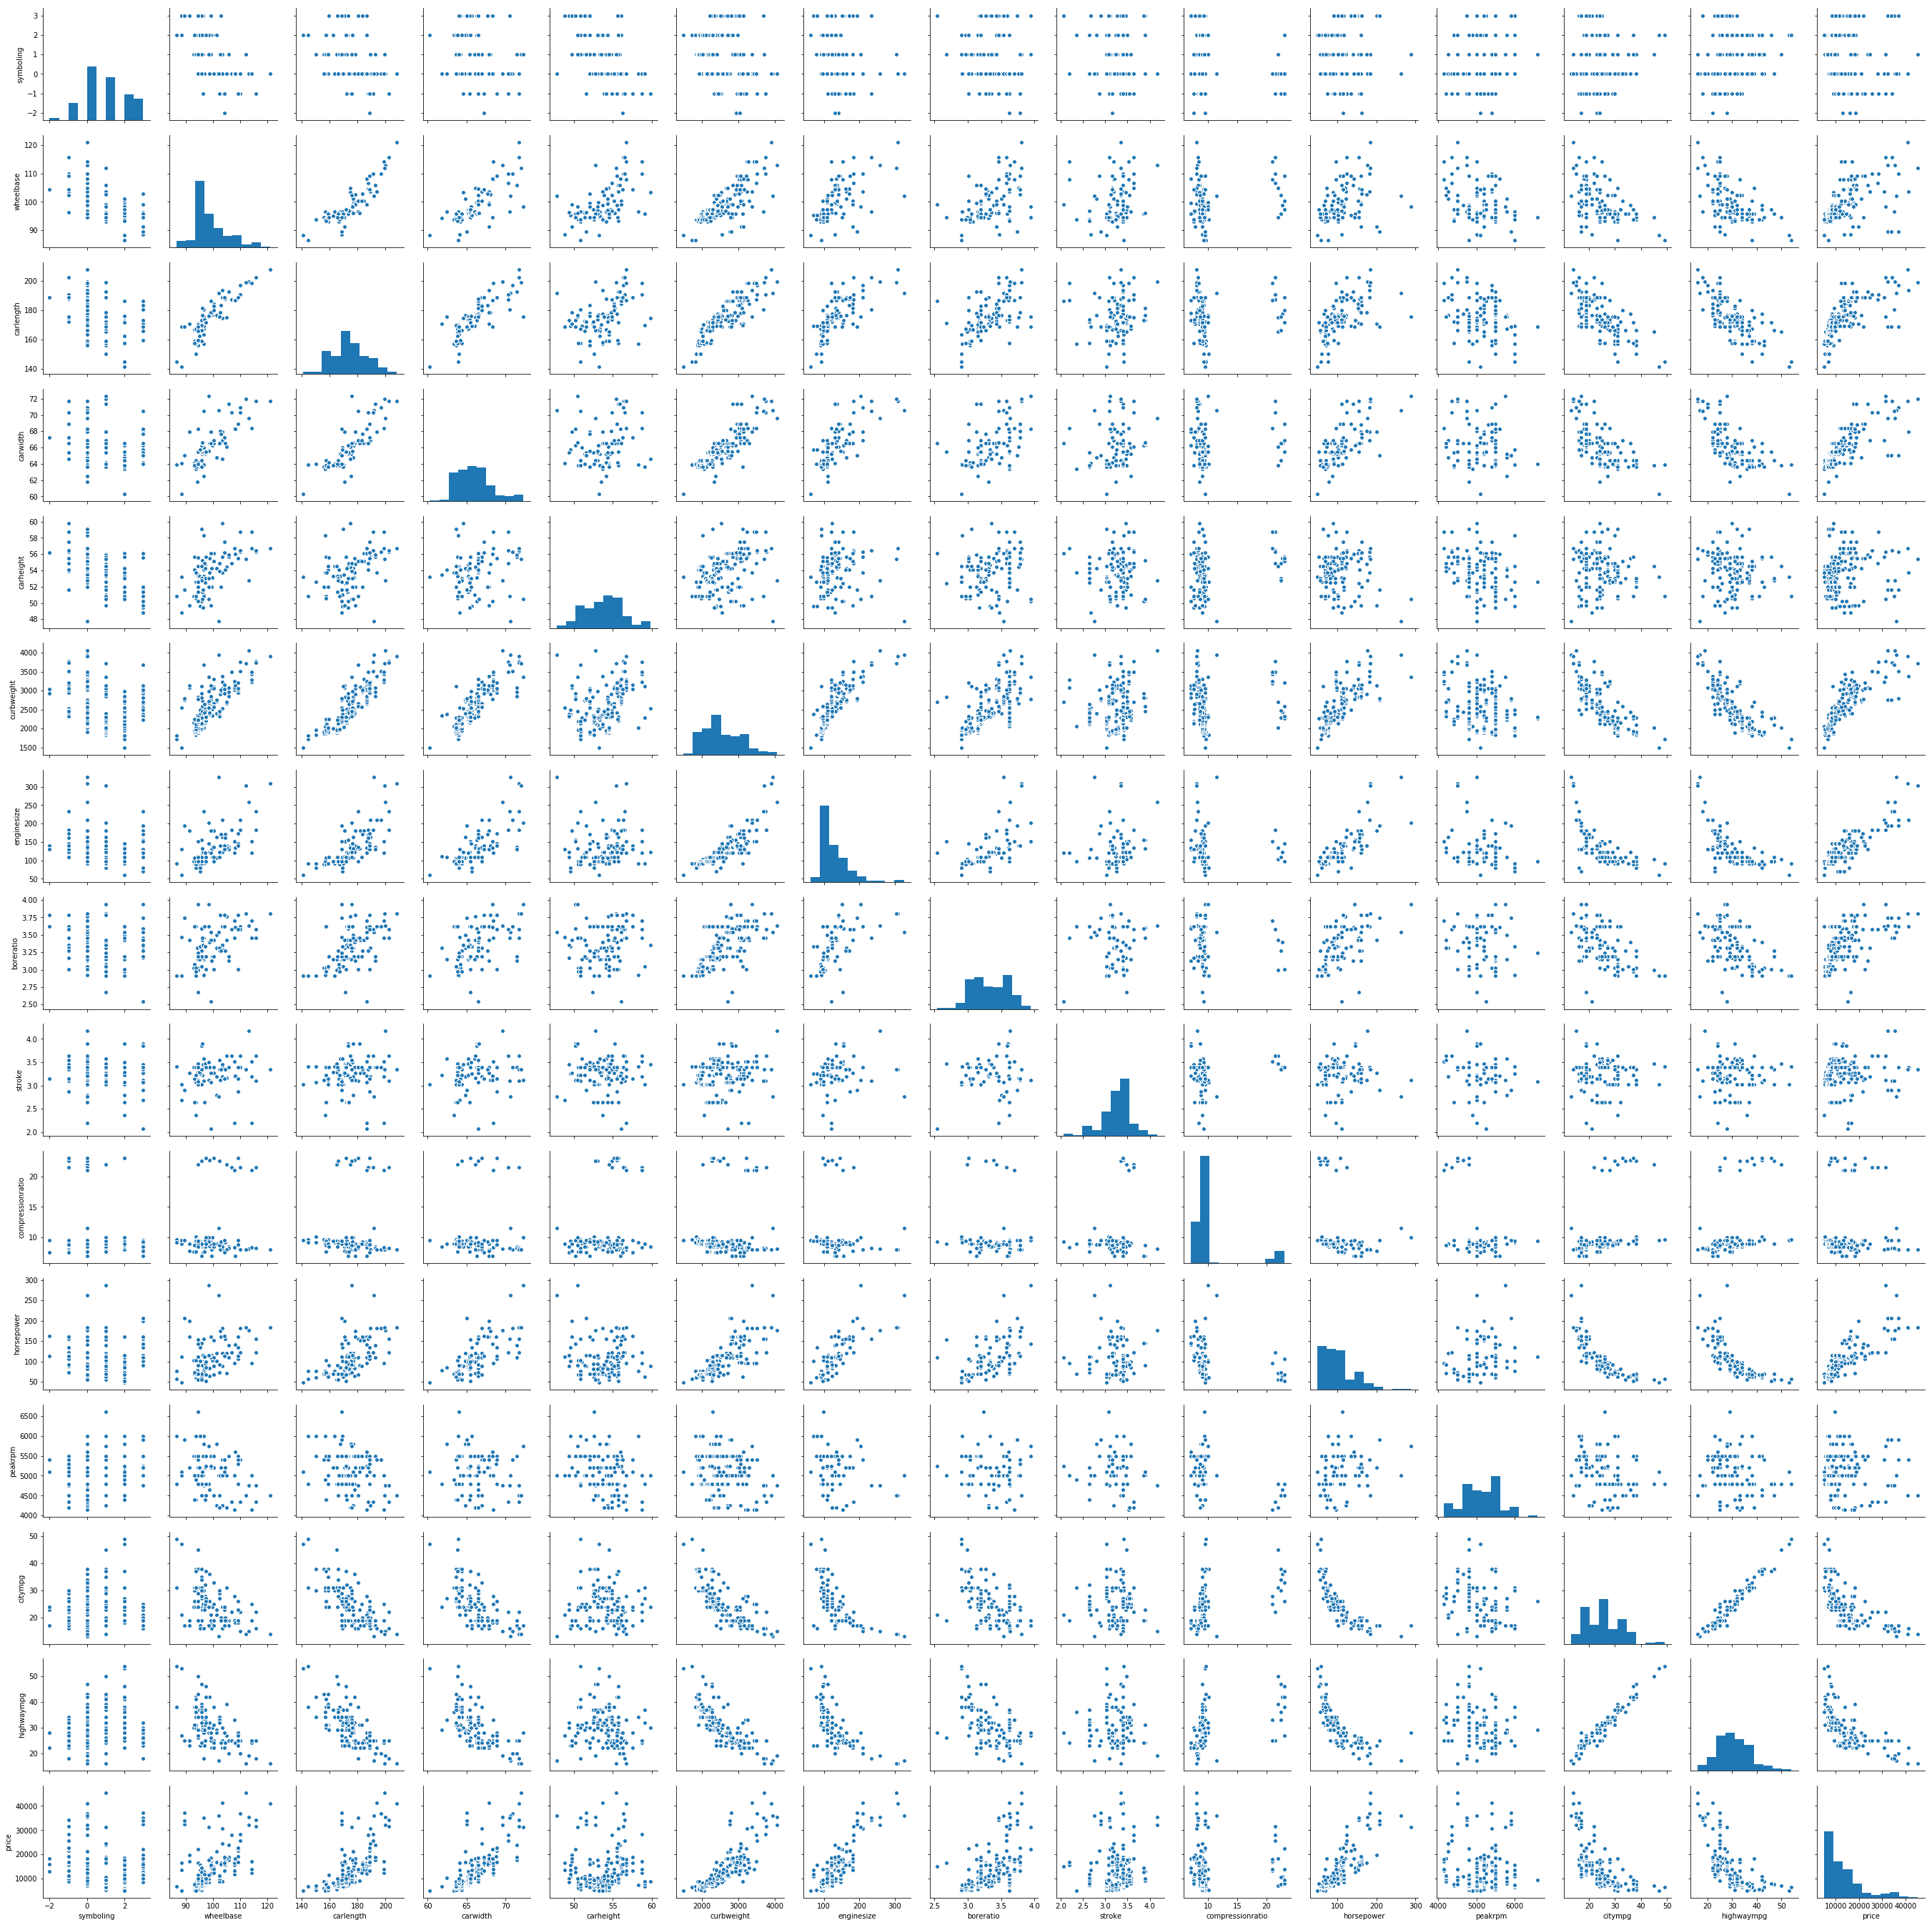

In [334]:
sns.pairplot(df)

As above plot shows few variables are linearly increasing and few variables are linearly decreasing trend but the insights are hard to read properly, we can take few variables and then check their distribution to understand clearly.

In [336]:
# Converting symboling column from int to object, Since in the data it is mentioned as categorical variable
df['symboling']=df['symboling'].astype(object)

In [337]:
# Extracting numerical columns
df.columns[df.dtypes!='object']

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# Numerical columns distribution with Target variable

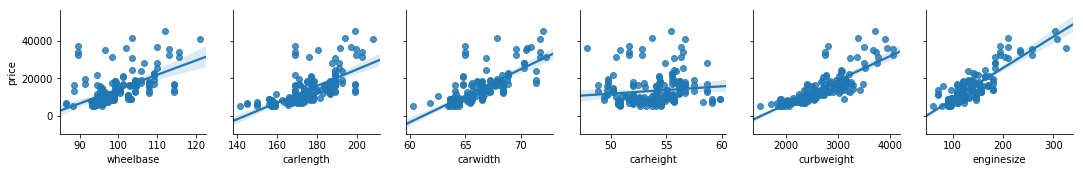

In [338]:
sns.pairplot(x_vars=['wheelbase', 'carlength', 'carwidth', 'carheight','curbweight', 'enginesize'],
             y_vars='price',data=df,kind='reg')

From the above graphs 'wheelbase','carlength','carwidth','curbweight' and 'enginesize' are following linearly increasing trend whereas 'carheight' doesn't following any trend.

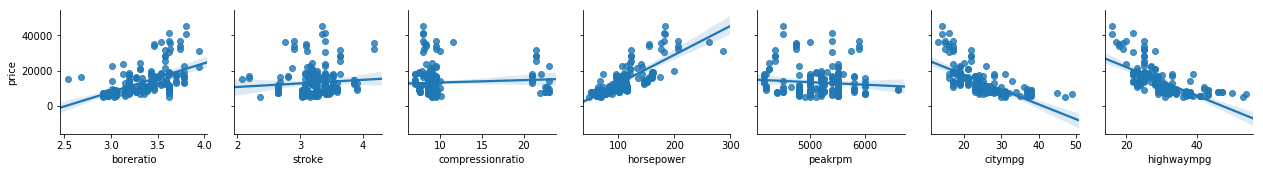

In [339]:
sns.pairplot(x_vars=['boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg'],
             y_vars='price',data=df,kind='reg')

From the above graphs 'boreratio','horsepower' are positively correlated with our target variable 'price' and 'citympg','highwaympg' are negatively correlated with target variable 'price'

# Visualizing categorical variables

In [340]:
# Extracting the categorical column names
df.columns[df.dtypes=='object']

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

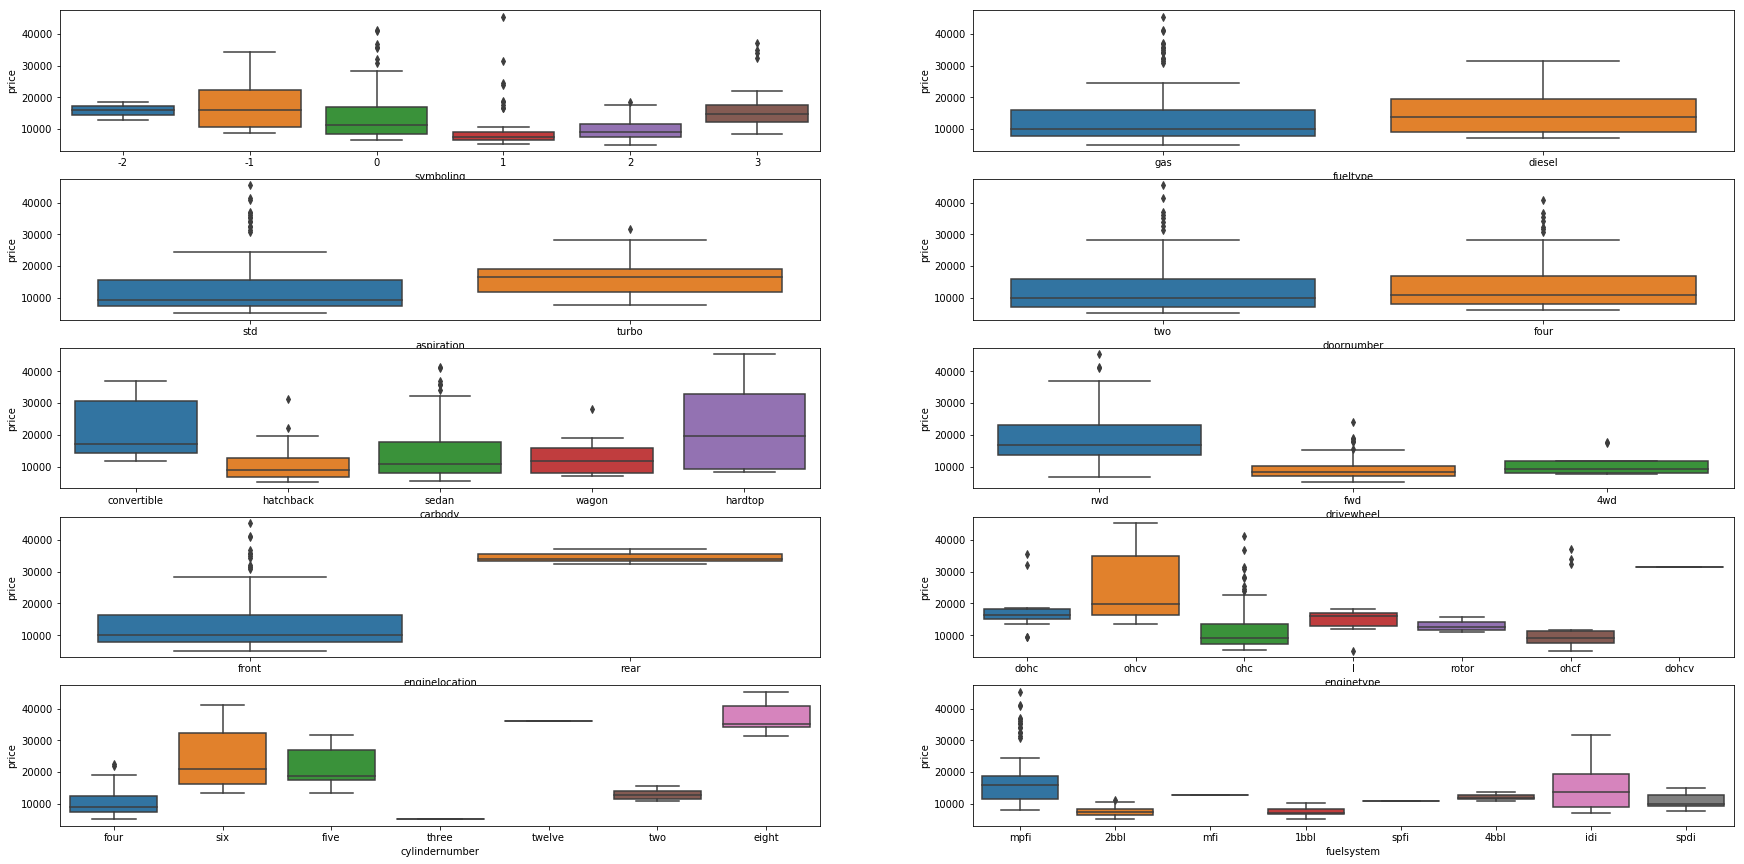

In [341]:
plt.figure(figsize=(30,15))
plt.subplot(5,2,1)
sns.boxplot(x='symboling',y='price',data=df)
plt.subplot(5,2,2)
sns.boxplot(x='fueltype',y='price',data=df)
plt.subplot(5,2,3)
sns.boxplot(x='aspiration',y='price',data=df)
plt.subplot(5,2,4)
sns.boxplot(x='doornumber',y='price',data=df)
plt.subplot(5,2,5)
sns.boxplot(x='carbody',y='price',data=df)
plt.subplot(5,2,6)
sns.boxplot(x='drivewheel',y='price',data=df)
plt.subplot(5,2,7)
sns.boxplot(x='enginelocation',y='price',data=df)
plt.subplot(5,2,8)
sns.boxplot(x='enginetype',y='price',data=df)
plt.subplot(5,2,9)
sns.boxplot(x='cylindernumber',y='price',data=df)
plt.subplot(5,2,10)
sns.boxplot(x='fuelsystem',y='price',data=df)

Insights from above graphs
- In symboling variable -ve indicates safe and +ve indicates risk. Few prices falls under 1,2 and 3 which comes under risk.
- In Fueltype compare to gas, diesel has good price
- In Aspiration turbo is getting price much compare to std
- In doornumber column both 2 and 4 doors following the same trend
- In Carbody, hardtop has more price
- In drivewheel, rwd holds the high price
- In Engine location, rear side engine holds high price even though their quantity is less
- In Engine type, every category has their significant price
- In Cylinder number, eight having high price and five,six cylinders are much contributing in the data
- In Fuel system, every category has their own trend while contributing to the data where as mpfi and idi holds much.

# Data Preparation

In [342]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [343]:
# Number of unique classes in each categorical columns
df.select_dtypes('object').apply(pd.Series.nunique,axis=0)

symboling          6
CarName           23
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
dtype: int64

Lets' do label encoding for the variables having 2 unique categories and one hot encoding for the variables having more than 2 categories. But before doing that we need to split train and test data, Since we dot fit_transform for training and do only transform for test data

In [344]:
# Seperating Independent variables and dependent variables
y=df.pop('price')
X=df

In [345]:
# Train and test splitting
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [346]:
# Label encoding the categorical variables having 2 columns
from sklearn.preprocessing import LabelEncoder
# Creating label encoder object
le = LabelEncoder()
le_count = 0
# Iterate through the columns
for col in X_train:
    if X_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(X_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(X_train[col])
            # Transform both training and testing data
            X_train[col] = le.transform(X_train[col]) 
            X_test[col] = le.transform(X_test[col])
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [347]:
# Creating dummy variables for the categorical columns
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)

In [348]:
X_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_0,symboling_1,symboling_2,symboling_3,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_subaru,CarName_toyota,CarName_volvo,CarName_vw,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
131,1,0,1,0,96.1,176.8,66.6,50.5,2460,132,3.46,3.900,8.7,90,5100,23,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
117,1,1,0,0,108.0,186.7,68.3,56.0,3130,134,3.61,3.210,7.0,142,5600,18,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
63,0,0,0,0,98.8,177.8,66.5,55.5,2443,122,3.39,3.390,22.7,64,4650,36,42,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
56,1,0,1,0,95.3,169.0,65.7,49.6,2380,70,3.33,3.255,9.4,101,6000,17,23,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
49,1,0,1,0,102.0,191.7,70.6,47.8,3950,326,3.54,2.760,11.5,262,5000,13,17,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [349]:
# Validating the shape of train and test dataset after dummy variable creation
print('Train data shape',X_train.shape)
print('Test data shape',X_test.shape)

Train data shape (143, 64)
Test data shape (62, 64)


For building a machine learning model we should make sure train and test has same columns

In [350]:
# Getting the missing columns from train and test data
missing_cols = set(X_train.columns)-set(X_test.columns)
missing_cols

{'CarName_saab',
 'CarName_volkswagen',
 'cylindernumber_three',
 'fuelsystem_mfi',
 'symboling_-1'}

In [351]:
X_train.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo', 'CarName_vw',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumb

In [352]:
X_test.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_subaru', 'CarName_toyota', 'CarName_volvo', 'CarName_vw',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylinder

In [353]:
# Adding missing columns in test data with default value equal to 0
for col in missing_cols:
    X_test[col] = 0
# Ensure both train and test having same column order    
X_test = X_test[X_train.columns]

In [354]:
# Now checking the shape of train and test dataset
print('Train data shape',X_train.shape)
print('Test data shape',X_test.shape)

Train data shape (143, 64)
Test data shape (62, 64)


In [357]:
# Scaling the variables to bring them to the same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [358]:
cols = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
        'compressionratio','horsepower','peakrpm','citympg','highwaympg']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

# Building Linear model

In [359]:
import statsmodels.api as sm

# Adding a constant
X_train = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train).fit()

In [360]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     43.95
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.67e-44
Time:                        14:01:01   Log-Likelihood:                -1240.4
No. Observations:                 143   AIC:                             2599.
Df Residuals:                      84   BIC:                             2774.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6948.5164   5272.954      1.318      0.191   -3537.330    1.74e+04
fueltype             -3200.5022   3345.237     -0.957      0.341   -9852.873    3451.869
aspiration             338.8015   1166.543      0.290      0.772   -1980.998    2658.601
doornumber            -165.4198    623.632     -0.265      0.791   -1405.581    1074.741
enginelocation        5417.0134   2733.695      1.982      0.051     -19.239    1.09e+04
wheelbase             3886.9406   4501.642      0.863      0.390   -5065.069    1.28e+04
carlength            -4417.6859   4298.360     -1.028      0.307    -1.3e+04    4130.074
carwidth              9460.2714   3996.432      2.367      0.020    1512.927    1.74e+04
carheight            -1362.6366   2083.274     -0.654      0.515   -5505.456    2780.183
curbweight            1.469e+04   5486.112      2.678      0.009    3781.407    2.56e+04
enginesize            1.753e+04   8165.056      2.147      0.035    1294.513    3.38e+04
boreratio            -1605.9808   3152.472     -0.509      0.612   -7875.016    4663.055
stroke               -5291.5658   2894.142     -1.828      0.071    -1.1e+04     463.752
compressionratio     -1.362e+04   1.07e+04     -1.277      0.205   -3.48e+04    7590.553
horsepower            3991.0396   5469.266      0.730      0.468   -6885.195    1.49e+04
peakrpm               3179.1689   2339.181      1.359      0.178   -1472.548    7830.886
citympg                347.6396   6560.402      0.053      0.958   -1.27e+04    1.34e+04
highwaympg            2630.1133   6634.327      0.396      0.693   -1.06e+04    1.58e+04
symboling_-1           756.4836   1464.757      0.516      0.607   -2156.346    3669.313
symboling_0           2063.0898   1787.412      1.154      0.252   -1491.375    5617.554
symboling_1           2101.1185   1823.468      1.152      0.252   -1525.048    5727.285
symboling_2           1981.5294   1942.996      1.020      0.311   -1882.332    5845.391
symboling_3            691.5364   1990.687      0.347      0.729   -3267.163    4650.236
CarName_audi          5036.3789   4346.625      1.159      0.250   -3607.362    1.37e+04
CarName_bmw           1.133e+04   4142.233      2.735      0.008    3091.678    1.96e+04
CarName_buick         6096.6700   4649.339      1.311      0.193   -3149.050    1.53e+04
CarName_chevrolet     1873.1490   2377.356      0.788      0.433   -2854.484    6600.782
CarName_dodge          838.4338   3771.585      0.222      0.825   -6661.777    8338.644
CarName_honda         2615.6415   4051.128      0.646      0.520   -5440.470    1.07e+04
CarName_isuzu         3523.5057   3840.202      0.918      0.361   -4113.157    1.12e+04
CarName_jaguar        6216.3289   4693.851      1.324      0.189   -3117.908    1.56e+04
CarName_mazda         2885.7520   3501.841      0.824    

From the above OLS output we got very good R-square -96.8% and Adjusted R-square- 94.6% but it doesn't mean that our model is really good. Since Linear Regression needs to satisfy the pre-defined assumptions. So now we will check the Multicollinearity with  VIF and p-value for statistically significant variables, based on that we will remove few variables which are not statistically significant.

In [361]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [362]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
53,enginetype_rotor,inf
26,CarName_chevrolet,inf
57,cylindernumber_three,inf
1,fueltype,inf
34,CarName_peugeot,inf
38,CarName_subaru,inf
58,cylindernumber_two,inf
60,fuelsystem_4bbl,inf
49,enginetype_l,inf
51,enginetype_ohcf,inf


From above OLS output, there are few variables having very high p-value and very high VIF(infinity) which means there are few variables highly correlated. Eliminating variables one-by-one will consume lot of time. So we will implement linear regression using RFE to select the top 30 features

In [363]:
# Importing Linear regression and RFE libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [375]:
linear_reg = LinearRegression()
#linear_reg.fit(X_train,y_train) 
rfe = RFE(linear_reg,30)
rfe.fit_transform(X_train,y_train)

array([[0.        , 0.2244898 , 0.44179104, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.20699708, 0.24179104, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.3090379 , 0.46119403, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.49271137, 0.71492537, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.2303207 , 0.41492537, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.37609329, 0.55373134, ..., 0.        , 0.        ,
        0.        ]])

In [378]:
# Identifying the top 30 columns after implementing RFE
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'carlength', 'carheight', 'curbweight',
       'enginesize', 'stroke', 'horsepower', 'peakrpm', 'highwaympg',
       'CarName_audi', 'CarName_bmw', 'CarName_buick', 'CarName_dodge',
       'CarName_jaguar', 'CarName_mitsubishi', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_subaru',
       'CarName_toyota', 'carbody_hatchback', 'carbody_wagon',
       'drivewheel_rwd', 'enginetype_ohcf', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_two',
       'fuelsystem_4bbl'],
      dtype='object')

In [401]:
# Model building using stats model
X_train_rfe = X_train[col]

In [402]:
# Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

In [403]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     89.94
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           5.20e-65
Time:                        15:03:43   Log-Likelihood:                -1262.3
No. Observations:                 143   AIC:                             2583.
Df Residuals:                     114   BIC:                             2668.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3778.7264   2866.170      1.318      0.190   -1899.134    9456.586
enginelocation       7317.9982   1805.682      4.053      0.000    3740.956    1.09e+04
wheelbase            8685.8788   2820.667      3.079      0.003    3098.160    1.43e+04
carlength           -5831.1114   2885.792     -2.021      0.046   -1.15e+04    -114.379
carheight           -2707.9034   1487.865     -1.820      0.071   -5655.352     239.545
curbweight           1.845e+04   3646.297      5.061      0.000    1.12e+04    2.57e+04
enginesize           1.581e+04   4070.000      3.886      0.000    7751.481    2.39e+04
stroke              -5488.7499   1671.165     -3.284      0.001   -8799.315   -2178.185
horsepower           7547.2922   2402.429      3.142      0.002    2788.098    1.23e+04
peakrpm              1605.3035   1317.617      1.218      0.226   -1004.885    4215.492
highwaympg           4798.7081   2186.162      2.195      0.030     467.937    9129.479
CarName_audi         2828.6025   1388.345      2.037      0.044      78.301    5578.904
CarName_bmw          9403.1483    997.037      9.431      0.000    7428.026    1.14e+04
CarName_buick        4263.5469   2109.979      2.021      0.046      83.696    8443.398
CarName_dodge       -2089.8383    857.897     -2.436      0.016   -3789.326    -390.351
CarName_jaguar       5014.7539   2330.141      2.152      0.033     398.763    9630.745
CarName_mitsubishi  -2931.8380    801.859     -3.656      0.000   -4520.315   -1343.361
CarName_peugeot     -2245.4355   1127.439     -1.992      0.049   -4478.884     -11.987
CarName_plymouth    -1780.1948    862.153     -2.065      0.041   -3488.113     -72.277
CarName_porsche      4833.5911   1999.703      2.417      0.017     872.195    8794.987
CarName_subaru      -5227.8432   1093.833     -4.779      0.000   -7394.718   -3060.968
CarName_toyota      -1337.3141    535.353     -2.498      0.014   -2397.845    -276.783
carbody_hatchback    -790.3748    447.404     -1.767      0.080   -1676.679      95.930
carbody_wagon        -538.7208    614.724     -0.876      0.383   -1756.484     679.043
drivewheel_rwd      -1940.7310    685.421     -2.831      0.005   -3298.544    -582.918
enginetype_ohcf      2090.1550    945.513      2.211      0.029     217.101    3963.209
cylindernumber_five -3294.5891   1830.209     -1.800      0.074   -6920.219     331.041
cylindernumber_four -2160.7678   1660.021     -1.302      0.196   -5449.256    1127.720
cylindernumber_six  -4337.8613   1778.030     -2.440      0.016   -7860.125    -815.598
cylindernumber_two   2253.7734   1497.297      1.505      0.135    -712.360    5219.907
fuelsystem_4bbl      2253.7734   1497.297      1.505      0.135    -712.360    5219.907
==============================================================================
Omnibus:    

# Model output

- Now we got R2 of 95.7% and adj-R2 of 94.6%.
- Prob(F-statistic) value is approximately equals to 0, which means our model is not by chance.
- But still there is multicollinearlity exists in the data, we will try to identify and eliminate.

In [404]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,fuelsystem_4bbl,inf
1,enginelocation,inf
29,cylindernumber_two,inf
25,enginetype_ohcf,inf
20,CarName_subaru,inf
0,const,344.330000
5,curbweight,20.440000
6,enginesize,17.570000
27,cylindernumber_four,17.180000
28,cylindernumber_six,13.170000


In [405]:
 # carbody_wagon has p-value of 38.3%, so let's remove it and then re-run the model
X_train_rfe_new = X_train_rfe.drop(['carbody_wagon'],axis=1)

In [406]:
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()

In [407]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     93.43
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           7.76e-66
Time:                        15:04:11   Log-Likelihood:                -1262.7
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     115   BIC:                             2664.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3812.0792   2863.025      1.331      0.186   -1859.022    9483.180
enginelocation       7452.3144   1797.350      4.146      0.000    3892.110     1.1e+04
wheelbase            8947.0290   2802.051      3.193      0.002    3396.706    1.45e+04
carlength           -5869.5159   2882.548     -2.036      0.044   -1.16e+04    -159.744
carheight           -3137.5684   1403.347     -2.236      0.027   -5917.329    -357.808
curbweight           1.794e+04   3595.304      4.990      0.000    1.08e+04    2.51e+04
enginesize           1.631e+04   4026.687      4.050      0.000    8332.151    2.43e+04
stroke              -5577.3190   1666.423     -3.347      0.001   -8878.182   -2276.456
horsepower           7814.4785   2380.600      3.283      0.001    3098.967    1.25e+04
peakrpm              1453.4774   1304.859      1.114      0.268   -1131.198    4038.153
highwaympg           4955.9040   2176.592      2.277      0.025     644.493    9267.315
CarName_audi         2832.8277   1386.936      2.043      0.043      85.575    5580.080
CarName_bmw          9527.0569    985.965      9.663      0.000    7574.051    1.15e+04
CarName_buick        4250.2511   2107.795      2.016      0.046      75.115    8425.387
CarName_dodge       -2227.6771    842.504     -2.644      0.009   -3896.516    -558.838
CarName_jaguar       5056.8901   2327.294      2.173      0.032     446.969    9666.811
CarName_mitsubishi  -3040.1279    791.482     -3.841      0.000   -4607.901   -1472.355
CarName_peugeot     -2193.0833   1124.719     -1.950      0.054   -4420.935      34.769
CarName_plymouth    -1901.5198    850.106     -2.237      0.027   -3585.416    -217.623
CarName_porsche      4691.3455   1991.093      2.356      0.020     747.373    8635.318
CarName_subaru      -5385.3008   1077.887     -4.996      0.000   -7520.388   -3250.214
CarName_toyota      -1387.0106    531.804     -2.608      0.010   -2440.413    -333.609
carbody_hatchback    -753.8323    445.007     -1.694      0.093   -1635.306     127.642
drivewheel_rwd      -1972.1123    683.794     -2.884      0.005   -3326.576    -617.648
enginetype_ohcf      2067.0137    944.190      2.189      0.031     196.754    3937.273
cylindernumber_five -3091.7573   1813.683     -1.705      0.091   -6684.315     500.800
cylindernumber_four -2047.3535   1653.298     -1.238      0.218   -5322.219    1227.512
cylindernumber_six  -4375.6901   1775.712     -2.464      0.015   -7893.034    -858.346
cylindernumber_two   2328.6265   1493.350      1.559      0.122    -629.413    5286.666
fuelsystem_4bbl      2328.6265   1493.350      1.559      0.122    -629.413    5286.666
==============================================================================
Omnibus:                       46.749   Durbin-Watson:                   1.801
Prob(Omnibus):       

In [408]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(15)

,Features,VIF
29,fuelsystem_4bbl,inf
1,enginelocation,inf
28,cylindernumber_two,inf
24,enginetype_ohcf,inf
20,CarName_subaru,inf
0,const,344.270000
5,curbweight,19.910000
6,enginesize,17.230000
26,cylindernumber_four,17.080000
27,cylindernumber_six,13.160000


In [409]:
# Removing highly correlated fuelsystem_4bbl variable
X_train_rfe_new = X_train_rfe_new.drop(['fuelsystem_4bbl'],axis=1)

In [410]:
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()

In [411]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     93.43
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           7.76e-66
Time:                        15:04:34   Log-Likelihood:                -1262.7
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     115   BIC:                             2664.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3812.0792   2863.025      1.331      0.186   -1859.022    9483.180
enginelocation       7452.3144   1797.350      4.146      0.000    3892.110     1.1e+04
wheelbase            8947.0290   2802.051      3.193      0.002    3396.706    1.45e+04
carlength           -5869.5159   2882.548     -2.036      0.044   -1.16e+04    -159.744
carheight           -3137.5684   1403.347     -2.236      0.027   -5917.329    -357.808
curbweight           1.794e+04   3595.304      4.990      0.000    1.08e+04    2.51e+04
enginesize           1.631e+04   4026.687      4.050      0.000    8332.151    2.43e+04
stroke              -5577.3190   1666.423     -3.347      0.001   -8878.182   -2276.456
horsepower           7814.4785   2380.600      3.283      0.001    3098.967    1.25e+04
peakrpm              1453.4774   1304.859      1.114      0.268   -1131.198    4038.153
highwaympg           4955.9040   2176.592      2.277      0.025     644.493    9267.315
CarName_audi         2832.8277   1386.936      2.043      0.043      85.575    5580.080
CarName_bmw          9527.0569    985.965      9.663      0.000    7574.051    1.15e+04
CarName_buick        4250.2511   2107.795      2.016      0.046      75.115    8425.387
CarName_dodge       -2227.6771    842.504     -2.644      0.009   -3896.516    -558.838
CarName_jaguar       5056.8901   2327.294      2.173      0.032     446.969    9666.811
CarName_mitsubishi  -3040.1279    791.482     -3.841      0.000   -4607.901   -1472.355
CarName_peugeot     -2193.0833   1124.719     -1.950      0.054   -4420.935      34.769
CarName_plymouth    -1901.5198    850.106     -2.237      0.027   -3585.416    -217.623
CarName_porsche      4691.3455   1991.093      2.356      0.020     747.373    8635.318
CarName_subaru      -5385.3008   1077.887     -4.996      0.000   -7520.388   -3250.214
CarName_toyota      -1387.0106    531.804     -2.608      0.010   -2440.413    -333.609
carbody_hatchback    -753.8323    445.007     -1.694      0.093   -1635.306     127.642
drivewheel_rwd      -1972.1123    683.794     -2.884      0.005   -3326.576    -617.648
enginetype_ohcf      2067.0137    944.190      2.189      0.031     196.754    3937.273
cylindernumber_five -3091.7573   1813.683     -1.705      0.091   -6684.315     500.800
cylindernumber_four -2047.3535   1653.298     -1.238      0.218   -5322.219    1227.512
cylindernumber_six  -4375.6901   1775.712     -2.464      0.015   -7893.034    -858.346
cylindernumber_two   4657.2530   2986.700      1.559      0.122   -1258.826    1.06e+04
==============================================================================
Omnibus:                       46.749   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.732
Skew:                         

In [412]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(15)

,Features,VIF
20,CarName_subaru,inf
1,enginelocation,inf
24,enginetype_ohcf,inf
0,const,344.270000
5,curbweight,19.910000
6,enginesize,17.230000
26,cylindernumber_four,17.080000
27,cylindernumber_six,13.160000
8,horsepower,12.650000
3,carlength,12.370000


In [413]:
# CarName_subaru has VIF of infinity so dropping the value eventhough it is statistically significant
X_train_rfe_new = X_train_rfe_new.drop(['CarName_subaru'],axis=1)

In [414]:
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()

In [415]:
 lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     93.43
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           7.76e-66
Time:                        15:07:50   Log-Likelihood:                -1262.7
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     115   BIC:                             2664.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3812.0792   2863.025      1.331      0.186   -1859.022    9483.180
enginelocation       1.284e+04   2809.469      4.569      0.000    7272.597    1.84e+04
wheelbase            8947.0290   2802.051      3.193      0.002    3396.706    1.45e+04
carlength           -5869.5159   2882.548     -2.036      0.044   -1.16e+04    -159.744
carheight           -3137.5684   1403.347     -2.236      0.027   -5917.329    -357.808
curbweight           1.794e+04   3595.304      4.990      0.000    1.08e+04    2.51e+04
enginesize           1.631e+04   4026.687      4.050      0.000    8332.151    2.43e+04
stroke              -5577.3190   1666.423     -3.347      0.001   -8878.182   -2276.456
horsepower           7814.4785   2380.600      3.283      0.001    3098.967    1.25e+04
peakrpm              1453.4774   1304.859      1.114      0.268   -1131.198    4038.153
highwaympg           4955.9040   2176.592      2.277      0.025     644.493    9267.315
CarName_audi         2832.8277   1386.936      2.043      0.043      85.575    5580.080
CarName_bmw          9527.0569    985.965      9.663      0.000    7574.051    1.15e+04
CarName_buick        4250.2511   2107.795      2.016      0.046      75.115    8425.387
CarName_dodge       -2227.6771    842.504     -2.644      0.009   -3896.516    -558.838
CarName_jaguar       5056.8901   2327.294      2.173      0.032     446.969    9666.811
CarName_mitsubishi  -3040.1279    791.482     -3.841      0.000   -4607.901   -1472.355
CarName_peugeot     -2193.0833   1124.719     -1.950      0.054   -4420.935      34.769
CarName_plymouth    -1901.5198    850.106     -2.237      0.027   -3585.416    -217.623
CarName_porsche      4691.3455   1991.093      2.356      0.020     747.373    8635.318
CarName_toyota      -1387.0106    531.804     -2.608      0.010   -2440.413    -333.609
carbody_hatchback    -753.8323    445.007     -1.694      0.093   -1635.306     127.642
drivewheel_rwd      -1972.1123    683.794     -2.884      0.005   -3326.576    -617.648
enginetype_ohcf     -3318.2871    936.058     -3.545      0.001   -5172.438   -1464.136
cylindernumber_five -3091.7573   1813.683     -1.705      0.091   -6684.315     500.800
cylindernumber_four -2047.3535   1653.298     -1.238      0.218   -5322.219    1227.512
cylindernumber_six  -4375.6901   1775.712     -2.464      0.015   -7893.034    -858.346
cylindernumber_two   4657.2530   2986.700      1.559      0.122   -1258.826    1.06e+04
==============================================================================
Omnibus:                       46.749   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.732
Skew:                           1.208   Prob(JB):                     1.86e-33
Kurtosis:                       7.412  

In [416]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(15)

,Features,VIF
0,const,344.27
5,curbweight,19.91
6,enginesize,17.23
25,cylindernumber_four,17.08
26,cylindernumber_six,13.16
8,horsepower,12.65
3,carlength,12.37
2,wheelbase,9.90
10,highwaympg,6.48
13,CarName_buick,5.07


In [417]:
# cylindernumber_four has high p-value and high vif
X_train_rfe_new = X_train_rfe_new.drop(['cylindernumber_four'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()

In [418]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     96.52
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.66e-66
Time:                        15:10:10   Log-Likelihood:                -1263.7
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     116   BIC:                             2661.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1657.3854   2278.851      0.727      0.469   -2856.165    6170.936
enginelocation       1.275e+04   2814.974      4.528      0.000    7171.904    1.83e+04
wheelbase            9173.8161   2802.482      3.273      0.001    3623.147    1.47e+04
carlength           -6410.9390   2855.741     -2.245      0.027   -1.21e+04    -754.784
carheight           -2981.8120   1400.910     -2.128      0.035   -5756.490    -207.134
curbweight           1.759e+04   3592.532      4.897      0.000    1.05e+04    2.47e+04
enginesize           1.768e+04   3879.843      4.557      0.000    9997.087    2.54e+04
stroke              -6101.5179   1615.464     -3.777      0.000   -9301.148   -2901.888
horsepower           8244.6845   2360.525      3.493      0.001    3569.367    1.29e+04
peakrpm              1500.5371   1307.302      1.148      0.253   -1088.739    4089.813
highwaympg           5514.3138   2134.261      2.584      0.011    1287.142    9741.486
CarName_audi         3210.0045   1356.186      2.367      0.020     523.907    5896.102
CarName_bmw          9487.0983    987.700      9.605      0.000    7530.834    1.14e+04
CarName_buick        5442.6005   1879.328      2.896      0.005    1720.355    9164.847
CarName_dodge       -2263.6036    843.939     -2.682      0.008   -3935.131    -592.076
CarName_jaguar       5048.6187   2332.630      2.164      0.032     428.551    9668.686
CarName_mitsubishi  -3024.2568    793.196     -3.813      0.000   -4595.281   -1453.233
CarName_peugeot     -2098.1102   1124.679     -1.866      0.065   -4325.678     129.458
CarName_plymouth    -1925.2881    851.841     -2.260      0.026   -3612.467    -238.109
CarName_porsche      4523.2704   1991.025      2.272      0.025     579.795    8466.745
CarName_toyota      -1389.5929    533.022     -2.607      0.010   -2445.310    -333.876
carbody_hatchback    -759.8925    446.003     -1.704      0.091   -1643.257     123.472
drivewheel_rwd      -2049.2955    682.512     -3.003      0.003   -3401.096    -697.495
enginetype_ohcf     -3473.1052    929.803     -3.735      0.000   -5314.696   -1631.514
cylindernumber_five -1479.3027   1265.426     -1.169      0.245   -3985.638    1027.032
cylindernumber_six  -2519.0076    953.593     -2.642      0.009   -4407.718    -630.297
cylindernumber_two   7136.8660   2221.153      3.213      0.002    2737.593    1.15e+04
==============================================================================
Omnibus:                       46.549   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.895
Skew:                           1.227   Prob(JB):                     1.54e-31
Kurtosis:                       7.219   Cond. No.                         51.2
================================================

In [419]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(15)

,Features,VIF
0,const,217.11
5,curbweight,19.79
6,enginesize,15.92
8,horsepower,12.38
3,carlength,12.08
2,wheelbase,9.86
10,highwaympg,6.20
1,enginelocation,4.57
22,drivewheel_rwd,4.30
13,CarName_buick,4.01


In [420]:
# peakrpm has high p-value
X_train_rfe_new = X_train_rfe_new.drop(['peakrpm'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()

In [421]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     100.1
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.13e-67
Time:                        15:11:51   Log-Likelihood:                -1264.5
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     117   BIC:                             2658.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3139.5144   1880.256      1.670      0.098    -584.235    6863.264
enginelocation       1.315e+04   2797.161      4.700      0.000    7607.187    1.87e+04
wheelbase            9576.1391   2784.246      3.439      0.001    4062.086    1.51e+04
carlength           -6841.3037   2834.859     -2.413      0.017   -1.25e+04   -1227.015
carheight           -3090.2799   1399.614     -2.208      0.029   -5862.142    -318.418
curbweight           1.675e+04   3521.450      4.756      0.000    9775.531    2.37e+04
enginesize           1.645e+04   3732.813      4.406      0.000    9054.336    2.38e+04
stroke              -6252.6234   1612.274     -3.878      0.000   -9445.648   -3059.599
horsepower           9196.2643   2213.149      4.155      0.000    4813.238    1.36e+04
highwaympg           4863.7944   2060.426      2.361      0.020     783.229    8944.360
CarName_audi         3236.8141   1357.824      2.384      0.019     547.716    5925.913
CarName_bmw          9343.0192    981.019      9.524      0.000    7400.162    1.13e+04
CarName_buick        5500.3747   1881.201      2.924      0.004    1774.755    9225.995
CarName_dodge       -2315.1658    843.885     -2.743      0.007   -3986.436    -643.896
CarName_jaguar       5261.6746   2328.385      2.260      0.026     650.429    9872.920
CarName_mitsubishi  -3084.0502    792.556     -3.891      0.000   -4653.666   -1514.434
CarName_peugeot     -2225.9439   1120.668     -1.986      0.049   -4445.368      -6.519
CarName_plymouth    -1871.6836    851.714     -2.198      0.030   -3558.458    -184.910
CarName_porsche      4617.3752   1992.033      2.318      0.022     672.258    8562.492
CarName_toyota      -1594.8759    502.802     -3.172      0.002   -2590.649    -599.103
carbody_hatchback    -835.2860    441.737     -1.891      0.061   -1710.124      39.552
drivewheel_rwd      -2057.3861    683.400     -3.011      0.003   -3410.825    -703.947
enginetype_ohcf     -3897.9161    854.125     -4.564      0.000   -5589.466   -2206.366
cylindernumber_five -1507.3930   1266.904     -1.190      0.237   -4016.431    1001.645
cylindernumber_six  -2469.0934    953.892     -2.588      0.011   -4358.226    -579.960
cylindernumber_two   7182.4958   2223.808      3.230      0.002    2778.361    1.16e+04
==============================================================================
Omnibus:                       50.571   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.567
Skew:                           1.297   Prob(JB):                     5.56e-38
Kurtosis:                       7.697   Cond. No.                         49.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance

In [422]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(15)

,Features,VIF
0,const,147.40
5,curbweight,18.96
6,enginesize,14.70
3,carlength,11.87
8,horsepower,10.85
2,wheelbase,9.71
9,highwaympg,5.76
1,enginelocation,4.50
21,drivewheel_rwd,4.30
12,CarName_buick,4.01


In [423]:
# cylindernumber_five has high p-value so dropping it
X_train_rfe_new = X_train_rfe_new.drop(['cylindernumber_five'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()


In [424]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           6.10e-68
Time:                        15:15:04   Log-Likelihood:                -1265.4
No. Observations:                 143   AIC:                             2581.
Df Residuals:                     118   BIC:                             2655.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2969.1424   1878.095      1.581      0.117    -749.998    6688.282
enginelocation      1.285e+04   2791.186      4.605      0.000    7326.274    1.84e+04
wheelbase           9541.6724   2788.994      3.421      0.001    4018.704    1.51e+04
carlength          -6640.7843   2834.825     -2.343      0.021   -1.23e+04   -1027.060
carheight          -2900.6084   1392.953     -2.082      0.039   -5659.034    -142.182
curbweight          1.571e+04   3417.745      4.597      0.000    8943.817    2.25e+04
enginesize          1.764e+04   3602.674      4.896      0.000    1.05e+04    2.48e+04
stroke             -6567.9061   1593.148     -4.123      0.000   -9722.774   -3413.038
horsepower          9481.2306   2204.024      4.302      0.000    5116.664    1.38e+04
highwaympg          5217.1303   2042.501      2.554      0.012    1172.422    9261.838
CarName_audi        2287.4359   1100.576      2.078      0.040     107.995    4466.877
CarName_bmw         9274.5382    981.053      9.454      0.000    7331.786    1.12e+04
CarName_buick       4878.8420   1810.400      2.695      0.008    1293.757    8463.927
CarName_dodge      -2215.8570    841.225     -2.634      0.010   -3881.712    -550.002
CarName_jaguar      5375.4325   2330.516      2.307      0.023     760.377    9990.488
CarName_mitsubishi -2955.6159    786.553     -3.758      0.000   -4513.204   -1398.027
CarName_peugeot    -2073.6366   1115.292     -1.859      0.065   -4282.219     134.946
CarName_plymouth   -1791.6910    850.550     -2.107      0.037   -3476.012    -107.370
CarName_porsche     4610.5862   1995.530      2.310      0.023     658.893    8562.280
CarName_toyota     -1542.0908    501.723     -3.074      0.003   -2535.638    -548.544
carbody_hatchback   -842.3668    442.475     -1.904      0.059   -1718.587      33.853
drivewheel_rwd     -2003.2818    683.086     -2.933      0.004   -3355.978    -650.586
enginetype_ohcf    -3907.3167    855.591     -4.567      0.000   -5601.621   -2213.013
cylindernumber_six -2537.4922    953.834     -2.660      0.009   -4426.343    -648.642
cylindernumber_two  7552.8271   2205.793      3.424      0.001    3184.755    1.19e+04
==============================================================================
Omnibus:                       49.171   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.098
Skew:                           1.269   Prob(JB):                     6.32e-36
Kurtosis:                       7.557   Cond. No.                         48.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [425]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(15)

,Features,VIF
0,const,146.55
5,curbweight,17.80
6,enginesize,13.64
3,carlength,11.83
8,horsepower,10.72
2,wheelbase,9.70
9,highwaympg,5.64
1,enginelocation,4.46
21,drivewheel_rwd,4.28
4,carheight,3.76


In [426]:
# Remvoving carlength variable as it is highly correlated

X_train_rfe_new = X_train_rfe_new.drop(['carlength'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()


In [427]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           8.41e-68
Time:                        15:17:29   Log-Likelihood:                -1268.6
No. Observations:                 143   AIC:                             2585.
Df Residuals:                     119   BIC:                             2656.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1509.8629   1804.875      0.837      0.405   -2063.969    5083.695
enginelocation      1.204e+04   2821.050      4.267      0.000    6450.720    1.76e+04
wheelbase           5858.0460   2346.469      2.497      0.014    1211.803    1.05e+04
carheight          -2475.5546   1406.885     -1.760      0.081   -5261.327     310.218
curbweight          1.187e+04   3054.811      3.886      0.000    5822.204    1.79e+04
enginesize           1.69e+04   3655.891      4.622      0.000    9659.177    2.41e+04
stroke             -5659.0069   1574.047     -3.595      0.000   -8775.777   -2542.237
horsepower          9290.1561   2243.659      4.141      0.000    4847.487    1.37e+04
highwaympg          5532.6518   2076.129      2.665      0.009    1421.710    9643.594
CarName_audi        2692.8949   1107.185      2.432      0.016     500.557    4885.233
CarName_bmw         9228.4896    999.180      9.236      0.000    7250.014    1.12e+04
CarName_buick       6214.9991   1750.299      3.551      0.001    2749.232    9680.766
CarName_dodge      -1705.4609    827.699     -2.060      0.042   -3344.387     -66.535
CarName_jaguar      6491.0556   2323.955      2.793      0.006    1889.392    1.11e+04
CarName_mitsubishi -2770.6305    797.198     -3.475      0.001   -4349.162   -1192.099
CarName_peugeot    -1499.4291   1108.349     -1.353      0.179   -3694.070     695.212
CarName_plymouth   -1557.7862    860.448     -1.810      0.073   -3261.560     145.987
CarName_porsche     5026.2863   2024.756      2.482      0.014    1017.068    9035.505
CarName_toyota     -1459.5515    509.833     -2.863      0.005   -2469.073    -450.030
carbody_hatchback   -446.1549    416.511     -1.071      0.286   -1270.888     378.578
drivewheel_rwd     -1553.2395    667.760     -2.326      0.022   -2875.470    -231.009
enginetype_ohcf    -3398.2645    842.995     -4.031      0.000   -5067.479   -1729.050
cylindernumber_six -2111.4944    953.830     -2.214      0.029   -4000.173    -222.815
cylindernumber_two  7159.9360   2240.496      3.196      0.002    2723.531    1.16e+04
==============================================================================
Omnibus:                       44.341   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.035
Skew:                           1.200   Prob(JB):                     1.16e-27
Kurtosis:                       6.881   Cond. No.                         42.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [428]:
# carbody_hatchback has high p-value

X_train_rfe_new = X_train_rfe_new.drop(['carbody_hatchback'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()


In [429]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.40e-68
Time:                        15:18:41   Log-Likelihood:                -1269.3
No. Observations:                 143   AIC:                             2585.
Df Residuals:                     120   BIC:                             2653.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1069.9601   1758.611      0.608      0.544   -2411.968    4551.888
enginelocation      1.265e+04   2763.675      4.578      0.000    7179.950    1.81e+04
wheelbase           6120.7289   2335.052      2.621      0.010    1497.488    1.07e+04
carheight          -2233.4111   1389.458     -1.607      0.111   -4984.441     517.619
curbweight          1.221e+04   3040.193      4.016      0.000    6191.139    1.82e+04
enginesize          1.672e+04   3654.195      4.575      0.000    9481.436     2.4e+04
stroke             -5458.4172   1563.828     -3.490      0.001   -8554.687   -2362.147
horsepower          8967.7253   2224.741      4.031      0.000    4562.892    1.34e+04
highwaympg          5507.6403   2077.272      2.651      0.009    1394.786    9620.494
CarName_audi        2707.7765   1107.778      2.444      0.016     514.453    4901.100
CarName_bmw         9323.7033    995.829      9.363      0.000    7352.031    1.13e+04
CarName_buick       6119.6477   1749.107      3.499      0.001    2656.537    9582.758
CarName_dodge      -1745.4283    827.365     -2.110      0.037   -3383.553    -107.303
CarName_jaguar      6460.0435   2325.202      2.778      0.006    1856.305    1.11e+04
CarName_mitsubishi -2812.7740    796.716     -3.530      0.001   -4390.215   -1235.332
CarName_peugeot    -1687.2515   1095.063     -1.541      0.126   -3855.400     480.897
CarName_plymouth   -1585.2262    860.595     -1.842      0.068   -3289.144     118.692
CarName_porsche     4809.9746   2015.897      2.386      0.019     818.638    8801.311
CarName_toyota     -1555.2380    502.255     -3.097      0.002   -2549.668    -560.808
drivewheel_rwd     -1437.6072    659.381     -2.180      0.031   -2743.136    -132.079
enginetype_ohcf    -3311.0870    839.572     -3.944      0.000   -4973.382   -1648.792
cylindernumber_six -2180.0343    952.266     -2.289      0.024   -4065.455    -294.614
cylindernumber_two  6841.2108   2222.013      3.079      0.003    2441.779    1.12e+04
==============================================================================
Omnibus:                       44.103   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.168
Skew:                           1.186   Prob(JB):                     6.61e-28
Kurtosis:                       6.921   Cond. No.                         41.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [430]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(15)


,Features,VIF
0,const,123.67
4,curbweight,13.56
5,enginesize,13.51
7,horsepower,10.52
2,wheelbase,6.55
8,highwaympg,5.62
1,enginelocation,4.21
19,drivewheel_rwd,3.84
3,carheight,3.60
21,cylindernumber_six,3.60


In [431]:
# Removing curbweight as it is having high vif eventhough it is statistically siginificant variable

X_train_rfe_new = X_train_rfe_new.drop(['curbweight'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()


In [432]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.49e-66
Time:                        15:20:34   Log-Likelihood:                -1278.3
No. Observations:                 143   AIC:                             2601.
Df Residuals:                     121   BIC:                             2666.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2183.5312   1842.003      1.185      0.238   -1463.199    5830.262
enginelocation      1.016e+04   2856.487      3.556      0.001    4503.537    1.58e+04
wheelbase           8266.3838   2411.061      3.429      0.001    3493.052     1.3e+04
carheight           -309.2397   1383.399     -0.224      0.823   -3048.043    2429.563
enginesize          2.149e+04   3665.367      5.863      0.000    1.42e+04    2.87e+04
stroke             -5295.6257   1658.170     -3.194      0.002   -8578.410   -2012.841
horsepower          1.219e+04   2200.668      5.541      0.000    7836.120    1.65e+04
highwaympg          3899.3421   2162.003      1.804      0.074    -380.914    8179.598
CarName_audi        3382.7330   1161.403      2.913      0.004    1083.428    5682.038
CarName_bmw         8685.6978   1042.735      8.330      0.000    6621.329    1.08e+04
CarName_buick       5848.6685   1853.870      3.155      0.002    2178.445    9518.892
CarName_dodge      -1724.5741    877.556     -1.965      0.052   -3461.927      12.779
CarName_jaguar      8027.7622   2431.305      3.302      0.001    3214.352    1.28e+04
CarName_mitsubishi -2310.0454    834.569     -2.768      0.007   -3962.295    -657.796
CarName_peugeot     -240.1067   1096.841     -0.219      0.827   -2411.592    1931.379
CarName_plymouth   -1408.2815    911.623     -1.545      0.125   -3213.079     396.516
CarName_porsche     5207.1531   2135.656      2.438      0.016     979.059    9435.248
CarName_toyota     -1326.8687    529.309     -2.507      0.014   -2374.775    -278.962
drivewheel_rwd      -858.2080    682.451     -1.258      0.211   -2209.301     492.885
enginetype_ohcf    -3107.9877    888.904     -3.496      0.001   -4867.809   -1348.167
cylindernumber_six -2019.3923   1009.162     -2.001      0.048   -4017.295     -21.490
cylindernumber_two  7668.1121   2346.715      3.268      0.001    3022.170    1.23e+04
==============================================================================
Omnibus:                       43.388   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.528
Skew:                           1.182   Prob(JB):                     1.83e-26
Kurtosis:                       6.782   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [433]:
# Removing CarName_peugeot as it is having high p-value
X_train_rfe_new = X_train_rfe_new.drop(['CarName_peugeot'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()


In [434]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     106.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.44e-67
Time:                        15:21:42   Log-Likelihood:                -1278.3
No. Observations:                 143   AIC:                             2599.
Df Residuals:                     122   BIC:                             2661.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2124.1461   1814.794      1.170      0.244   -1468.420    5716.712
enginelocation      1.004e+04   2796.708      3.591      0.000    4507.251    1.56e+04
wheelbase           8065.9786   2221.776      3.630      0.000    3667.751    1.25e+04
carheight           -276.7599   1370.042     -0.202      0.840   -2988.895    2435.375
enginesize           2.15e+04   3650.818      5.888      0.000    1.43e+04    2.87e+04
stroke             -5257.4806   1642.542     -3.201      0.002   -8509.056   -2005.905
horsepower          1.234e+04   2091.482      5.899      0.000    8196.877    1.65e+04
highwaympg          3976.2616   2124.918      1.871      0.064    -230.226    8182.749
CarName_audi        3395.8644   1155.319      2.939      0.004    1108.796    5682.933
CarName_bmw         8728.4305   1020.295      8.555      0.000    6708.655    1.07e+04
CarName_buick       5950.0923   1788.022      3.328      0.001    2410.524    9489.661
CarName_dodge      -1722.9274    874.093     -1.971      0.051   -3453.281       7.426
CarName_jaguar      8094.3940   2402.746      3.369      0.001    3337.918    1.29e+04
CarName_mitsubishi -2312.9699    831.200     -2.783      0.006   -3958.413    -667.527
CarName_plymouth   -1398.3268    906.928     -1.542      0.126   -3193.681     397.028
CarName_porsche     5217.3398   2126.801      2.453      0.016    1007.124    9427.556
CarName_toyota     -1296.1295    508.348     -2.550      0.012   -2302.455    -289.804
drivewheel_rwd      -897.5372    655.804     -1.369      0.174   -2195.767     400.692
enginetype_ohcf    -3085.1325    879.301     -3.509      0.001   -4825.796   -1344.469
cylindernumber_six -2012.2350   1004.689     -2.003      0.047   -4001.117     -23.353
cylindernumber_two  7731.1970   2319.848      3.333      0.001    3138.825    1.23e+04
==============================================================================
Omnibus:                       43.424   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.063
Skew:                           1.185   Prob(JB):                     2.31e-26
Kurtosis:                       6.767   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [435]:
# Removing carheight as it is having high p-value
X_train_rfe_new = X_train_rfe_new.drop(['carheight'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()


In [436]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     112.9
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.30e-68
Time:                        15:22:29   Log-Likelihood:                -1278.4
No. Observations:                 143   AIC:                             2597.
Df Residuals:                     123   BIC:                             2656.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1993.5893   1689.188      1.180      0.240   -1350.054    5337.233
enginelocation      9896.7027   2689.946      3.679      0.000    4572.119    1.52e+04
wheelbase           7781.2443   1710.716      4.549      0.000    4394.988    1.12e+04
enginesize          2.157e+04   3616.528      5.965      0.000    1.44e+04    2.87e+04
stroke             -5253.7589   1636.022     -3.211      0.002   -8492.164   -2015.354
horsepower          1.239e+04   2064.459      6.003      0.000    8307.415    1.65e+04
highwaympg          4049.6909   2085.418      1.942      0.054     -78.265    8177.647
CarName_audi        3446.6167   1123.265      3.068      0.003    1223.183    5670.051
CarName_bmw         8700.4771   1006.918      8.641      0.000    6707.344    1.07e+04
CarName_buick       5971.2040   1777.992      3.358      0.001    2451.778    9490.630
CarName_dodge      -1663.4383    819.776     -2.029      0.045   -3286.134     -40.742
CarName_jaguar      8169.2075   2364.758      3.455      0.001    3488.314    1.29e+04
CarName_mitsubishi -2226.1685    708.738     -3.141      0.002   -3629.072    -823.265
CarName_plymouth   -1345.1876    864.550     -1.556      0.122   -3056.511     366.136
CarName_porsche     5248.5830   2112.883      2.484      0.014    1066.260    9430.906
CarName_toyota     -1282.6414    501.975     -2.555      0.012   -2276.270    -289.013
drivewheel_rwd      -853.0132    615.244     -1.386      0.168   -2070.850     364.824
enginetype_ohcf    -3059.9122    866.992     -3.529      0.001   -4776.069   -1343.755
cylindernumber_six -1999.3205    998.736     -2.002      0.048   -3976.256     -22.385
cylindernumber_two  7831.9769   2256.718      3.471      0.001    3364.941    1.23e+04
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.879
Skew:                           1.188   Prob(JB):                     1.53e-26
Kurtosis:                       6.783   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [437]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(15)

,Features,VIF
0,const,103.02
3,enginesize,11.95
5,horsepower,8.18
6,highwaympg,5.11
1,enginelocation,3.60
18,cylindernumber_six,3.58
14,CarName_porsche,3.31
2,wheelbase,3.17
9,CarName_buick,3.10
16,drivewheel_rwd,3.02


In [438]:
# enginesize is having high vif, dropping the variable
X_train_rfe_new = X_train_rfe_new.drop(['enginesize'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()


In [439]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     91.61
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.26e-62
Time:                        15:24:14   Log-Likelihood:                -1296.5
No. Observations:                 143   AIC:                             2631.
Df Residuals:                     124   BIC:                             2687.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1936.8661   1910.266      1.014      0.313   -1844.086    5717.818
enginelocation      8774.8753   3034.608      2.892      0.005    2768.536    1.48e+04
wheelbase           1.104e+04   1833.106      6.025      0.000    7415.695    1.47e+04
stroke             -1812.6840   1731.355     -1.047      0.297   -5239.521    1614.153
horsepower          1.797e+04   2081.389      8.635      0.000    1.39e+04    2.21e+04
highwaympg          3487.1369   2355.979      1.480      0.141   -1176.006    8150.280
CarName_audi        2945.4182   1266.738      2.325      0.022     438.189    5452.648
CarName_bmw         9317.1898   1132.703      8.226      0.000    7075.253    1.16e+04
CarName_buick       1.368e+04   1380.667      9.910      0.000    1.09e+04    1.64e+04
CarName_dodge      -1950.4754    925.483     -2.108      0.037   -3782.266    -118.684
CarName_jaguar      1.202e+04   2572.465      4.674      0.000    6933.324    1.71e+04
CarName_mitsubishi -2145.8932    801.365     -2.678      0.008   -3732.019    -559.767
CarName_plymouth   -1615.4834    976.373     -1.655      0.101   -3547.998     317.032
CarName_porsche     6774.2175   2371.884      2.856      0.005    2079.594    1.15e+04
CarName_toyota     -1159.6507    567.203     -2.045      0.043   -2282.303     -36.998
drivewheel_rwd       -86.9900    680.454     -0.128      0.898   -1433.799    1259.819
enginetype_ohcf    -1880.5987    954.649     -1.970      0.051   -3770.117       8.919
cylindernumber_six   243.5070   1046.383      0.233      0.816   -1827.577    2314.591
cylindernumber_two  3383.4257   2408.753      1.405      0.163   -1384.171    8151.023
==============================================================================
Omnibus:                       45.793   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.668
Skew:                           1.186   Prob(JB):                     2.34e-32
Kurtosis:                       7.339   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [440]:
# drivewheel_rwd has high p-value
X_train_rfe_new = X_train_rfe_new.drop(['drivewheel_rwd'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()

In [441]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     97.76
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.26e-63
Time:                        15:25:27   Log-Likelihood:                -1296.5
No. Observations:                 143   AIC:                             2629.
Df Residuals:                     125   BIC:                             2682.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1934.1692   1902.619      1.017      0.311   -1831.351    5699.689
enginelocation      8782.4871   3022.063      2.906      0.004    2801.450    1.48e+04
wheelbase           1.095e+04   1684.632      6.502      0.000    7619.452    1.43e+04
stroke             -1776.2025   1700.944     -1.044      0.298   -5142.581    1590.176
horsepower          1.792e+04   2032.261      8.818      0.000    1.39e+04    2.19e+04
highwaympg          3492.5623   2346.310      1.489      0.139   -1151.077    8136.202
CarName_audi        2989.0941   1214.989      2.460      0.015     584.481    5393.707
CarName_bmw         9308.5555   1126.230      8.265      0.000    7079.607    1.15e+04
CarName_buick       1.369e+04   1374.815      9.955      0.000     1.1e+04    1.64e+04
CarName_dodge      -1935.8192    914.735     -2.116      0.036   -3746.193    -125.445
CarName_jaguar      1.204e+04   2559.722      4.704      0.000    6973.765    1.71e+04
CarName_mitsubishi -2128.1596    786.156     -2.707      0.008   -3684.061    -572.259
CarName_plymouth   -1604.3802    968.668     -1.656      0.100   -3521.495     312.734
CarName_porsche     6722.5346   2327.963      2.888      0.005    2115.206    1.13e+04
CarName_toyota     -1166.9832    562.070     -2.076      0.040   -2279.390     -54.576
enginetype_ohcf    -1852.1677    924.724     -2.003      0.047   -3682.310     -22.025
cylindernumber_six   219.3985   1025.191      0.214      0.831   -1809.582    2248.379
cylindernumber_two  3318.0067   2344.490      1.415      0.159   -1322.031    7958.044
==============================================================================
Omnibus:                       45.365   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.720
Skew:                           1.172   Prob(JB):                     3.75e-32
Kurtosis:                       7.335   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [442]:
# cylindernumber_six has high p-value
X_train_rfe_new = X_train_rfe_new.drop(['cylindernumber_six'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()

In [443]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     104.7
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.24e-64
Time:                        15:26:14   Log-Likelihood:                -1296.6
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     126   BIC:                             2677.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1860.1887   1863.853      0.998      0.320   -1828.322    5548.699
enginelocation      8919.6876   2942.074      3.032      0.003    3097.409    1.47e+04
wheelbase           1.093e+04   1675.881      6.525      0.000    7617.916    1.43e+04
stroke             -1785.4948   1693.939     -1.054      0.294   -5137.750    1566.760
horsepower          1.813e+04   1769.276     10.248      0.000    1.46e+04    2.16e+04
highwaympg          3575.6843   2305.160      1.551      0.123    -986.160    8137.529
CarName_audi        2952.6164   1198.409      2.464      0.015     581.000    5324.233
CarName_bmw         9437.6683    947.397      9.962      0.000    7562.797    1.13e+04
CarName_buick       1.362e+04   1339.224     10.174      0.000     1.1e+04    1.63e+04
CarName_dodge      -1946.1585    909.993     -2.139      0.034   -3747.007    -145.310
CarName_jaguar      1.218e+04   2464.552      4.942      0.000    7303.124    1.71e+04
CarName_mitsubishi -2149.5734    776.804     -2.767      0.007   -3686.846    -612.301
CarName_plymouth   -1602.0741    964.934     -1.660      0.099   -3511.649     307.501
CarName_porsche     6655.1440   2297.817      2.896      0.004    2107.832    1.12e+04
CarName_toyota     -1145.8763    551.250     -2.079      0.040   -2236.785     -54.968
enginetype_ohcf    -1854.4055    921.157     -2.013      0.046   -3677.347     -31.464
cylindernumber_two  3316.2970   2335.583      1.420      0.158   -1305.752    7938.346
==============================================================================
Omnibus:                       44.962   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.962
Skew:                           1.162   Prob(JB):                     9.04e-32
Kurtosis:                       7.312   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [444]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(15)


,Features,VIF
0,const,99.60
5,highwaympg,4.96
4,horsepower,4.77
1,enginelocation,3.42
13,CarName_porsche,3.11
2,wheelbase,2.42
15,enginetype_ohcf,1.87
3,stroke,1.85
8,CarName_buick,1.40
11,CarName_mitsubishi,1.23


 Now all variables having VIF of less than 5. So there is no multicorrelation. Lets' check the p-value and eliminate high p-value variables 

In [445]:
# Stroke variable has high p-value so removing it
X_train_rfe_new = X_train_rfe_new.drop(['stroke'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()

In [446]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     111.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.00e-65
Time:                        15:29:11   Log-Likelihood:                -1297.2
No. Observations:                 143   AIC:                             2626.
Df Residuals:                     127   BIC:                             2674.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1157.8225   1741.429      0.665      0.507   -2288.151    4603.796
enginelocation      8759.6506   2939.438      2.980      0.003    2943.034    1.46e+04
wheelbase           1.102e+04   1674.816      6.578      0.000    7702.054    1.43e+04
horsepower          1.772e+04   1725.687     10.267      0.000    1.43e+04    2.11e+04
highwaympg          3137.4533   2268.348      1.383      0.169   -1351.197    7626.104
CarName_audi        2788.0501   1188.715      2.345      0.021     435.798    5140.302
CarName_bmw         9475.5043    947.131     10.004      0.000    7601.304    1.13e+04
CarName_buick       1.349e+04   1333.816     10.115      0.000    1.09e+04    1.61e+04
CarName_dodge      -2089.4479    900.175     -2.321      0.022   -3870.731    -308.165
CarName_jaguar       1.14e+04   2352.616      4.847      0.000    6747.534    1.61e+04
CarName_mitsubishi -2353.8969    752.558     -3.128      0.002   -3843.073    -864.721
CarName_plymouth   -1657.5889    963.916     -1.720      0.088   -3565.005     249.827
CarName_porsche     6829.1844   2292.878      2.978      0.003    2291.992    1.14e+04
CarName_toyota     -1158.7136    551.357     -2.102      0.038   -2249.749     -67.678
enginetype_ohcf    -1359.9581    793.114     -1.715      0.089   -2929.388     209.472
cylindernumber_two  3209.4194   2334.400      1.375      0.172   -1409.937    7828.776
==============================================================================
Omnibus:                       41.013   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.836
Skew:                           1.083   Prob(JB):                     9.51e-27
Kurtosis:                       6.927   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [447]:
# cylindernumber_two has high p-value
X_train_rfe_new = X_train_rfe_new.drop(['cylindernumber_two'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()

In [448]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     118.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.56e-66
Time:                        15:30:25   Log-Likelihood:                -1298.2
No. Observations:                 143   AIC:                             2626.
Df Residuals:                     128   BIC:                             2671.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1810.6029   1681.266      1.077      0.284   -1516.070    5137.275
enginelocation      8944.4200   2946.557      3.036      0.003    3114.154    1.48e+04
wheelbase           1.061e+04   1654.349      6.414      0.000    7337.188    1.39e+04
horsepower          1.732e+04   1706.864     10.145      0.000    1.39e+04    2.07e+04
highwaympg          2339.4545   2200.441      1.063      0.290   -2014.494    6693.403
CarName_audi        2669.0376   1189.674      2.244      0.027     315.064    5023.011
CarName_bmw         9450.2459    950.240      9.945      0.000    7570.035    1.13e+04
CarName_buick       1.351e+04   1338.349     10.097      0.000    1.09e+04    1.62e+04
CarName_dodge      -2171.6660    901.304     -2.409      0.017   -3955.049    -388.283
CarName_jaguar      1.145e+04   2360.558      4.849      0.000    6776.752    1.61e+04
CarName_mitsubishi -2448.8430    751.984     -3.257      0.001   -3936.771    -960.915
CarName_plymouth   -1717.9965    966.257     -1.778      0.078   -3629.901     193.908
CarName_porsche     6739.9367   2299.915      2.931      0.004    2189.162    1.13e+04
CarName_toyota     -1219.1699    551.508     -2.211      0.029   -2310.423    -127.917
enginetype_ohcf    -1484.7685    790.637     -1.878      0.063   -3049.178      79.641
==============================================================================
Omnibus:                       40.093   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.347
Skew:                           1.067   Prob(JB):                     1.48e-25
Kurtosis:                       6.826   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [449]:
# highwaympg has high p-value
X_train_rfe_new = X_train_rfe_new.drop(['highwaympg'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()


In [450]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     127.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           6.91e-67
Time:                        15:31:19   Log-Likelihood:                -1298.9
No. Observations:                 143   AIC:                             2626.
Df Residuals:                     129   BIC:                             2667.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3494.7933    563.525      6.202      0.000    2379.845    4609.741
enginelocation      9471.8773   2905.958      3.259      0.001    3722.369    1.52e+04
wheelbase           9855.6780   1494.970      6.593      0.000    6897.843    1.28e+04
horsepower          1.594e+04   1115.910     14.287      0.000    1.37e+04    1.82e+04
CarName_audi        2468.2235   1175.177      2.100      0.038     143.106    4793.341
CarName_bmw         9513.8986    948.831     10.027      0.000    7636.614    1.14e+04
CarName_buick        1.36e+04   1336.772     10.171      0.000     1.1e+04    1.62e+04
CarName_dodge      -2239.4569    899.500     -2.490      0.014   -4019.139    -459.775
CarName_jaguar      1.163e+04   2355.157      4.940      0.000    6975.185    1.63e+04
CarName_mitsubishi -2539.6105    747.499     -3.397      0.001   -4018.555   -1060.666
CarName_plymouth   -1739.1301    966.540     -1.799      0.074   -3651.454     173.193
CarName_porsche     6727.5789   2301.047      2.924      0.004    2174.901    1.13e+04
CarName_toyota     -1257.3843    550.614     -2.284      0.024   -2346.787    -167.982
enginetype_ohcf    -1692.4771    766.506     -2.208      0.029   -3209.028    -175.926
==============================================================================
Omnibus:                       41.630   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.775
Skew:                           1.080   Prob(JB):                     1.80e-28
Kurtosis:                       7.096   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [452]:
#CarName_plymouth has high p-value
X_train_rfe_new = X_train_rfe_new.drop(['CarName_plymouth'],axis=1)
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train, X_train_rfe_new).fit()

In [453]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     135.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.84e-67
Time:                        15:32:49   Log-Likelihood:                -1300.6
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     130   BIC:                             2666.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3226.3380    548.073      5.887      0.000    2142.042    4310.634
enginelocation      9283.1906   2928.951      3.169      0.002    3488.611    1.51e+04
wheelbase            1.01e+04   1501.327      6.730      0.000    7134.111    1.31e+04
horsepower          1.609e+04   1122.312     14.339      0.000    1.39e+04    1.83e+04
CarName_audi        2554.5478   1184.260      2.157      0.033     211.631    4897.465
CarName_bmw         9569.2012    956.459     10.005      0.000    7676.961    1.15e+04
CarName_buick       1.355e+04   1348.022     10.055      0.000    1.09e+04    1.62e+04
CarName_dodge      -2075.8950    902.563     -2.300      0.023   -3861.509    -290.281
CarName_jaguar      1.159e+04   2375.211      4.880      0.000    6891.880    1.63e+04
CarName_mitsubishi -2387.9583    749.097     -3.188      0.002   -3869.957    -905.959
CarName_porsche     6848.9212   2319.769      2.952      0.004    2259.536    1.14e+04
CarName_toyota     -1113.9815    549.484     -2.027      0.045   -2201.070     -26.893
enginetype_ohcf    -1528.0766    767.563     -1.991      0.049   -3046.607      -9.546
==============================================================================
Omnibus:                       39.505   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.292
Skew:                           1.051   Prob(JB):                     4.13e-25
Kurtosis:                       6.798   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Final output

- So finally we got R2 of 92.6 and Adj-R2 of 91.9
- Prob (F-statistic): 2.84e-67 which is approximately equals to 0, So our model fit is not by chance.

In [454]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new.values, i) for i in range(X_train_rfe_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(15)

,Features,VIF
0,const,8.39
1,enginelocation,3.31
10,CarName_porsche,3.09
2,wheelbase,1.89
3,horsepower,1.87
6,CarName_buick,1.38
12,enginetype_ohcf,1.27
5,CarName_bmw,1.19
9,CarName_mitsubishi,1.11
11,CarName_toyota,1.10


Now both VIF and P-values are in the permissible level. Now will check the major Residual assumption for linear regression

# Residual analysis of train data

In [455]:
y_train_pred=lm.predict(X_train_rfe_new)

Text(0.5,0,'Errors')

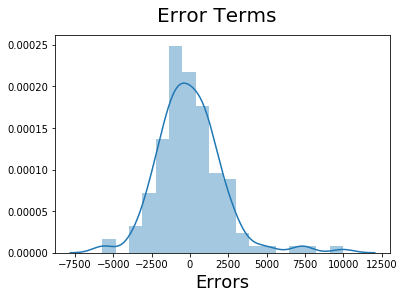

In [460]:
fig = plt.figure()
sns.distplot(y_train-y_train_pred)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)

- The very important assumption of linear regression- The error terms must be normally distributed and it is satisfied from above graph

In [461]:
X_train_rfe_new.columns

Index(['const', 'enginelocation', 'wheelbase', 'horsepower', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_dodge', 'CarName_jaguar',
       'CarName_mitsubishi', 'CarName_porsche', 'CarName_toyota',
       'enginetype_ohcf'],
      dtype='object')

In [464]:
# Keeping the finalized variables from train data in to test data
X_test_new = X_test[['enginelocation', 'wheelbase', 'horsepower', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_dodge', 'CarName_jaguar',
       'CarName_mitsubishi', 'CarName_porsche', 'CarName_toyota',
       'enginetype_ohcf']]

In [466]:
X_test_new.head()

,enginelocation,wheelbase,horsepower,CarName_audi,CarName_bmw,CarName_buick,CarName_dodge,CarName_jaguar,CarName_mitsubishi,CarName_porsche,CarName_toyota,enginetype_ohcf
131,0,0.276968,0.264151,0,0,0,0,0,0,0,0,0
117,0,0.623907,0.591195,0,0,0,0,0,0,0,0,0
63,0,0.355685,0.100629,0,0,0,0,0,0,0,0,0
56,0,0.253644,0.333333,0,0,0,0,0,0,0,0,0
49,0,0.448980,1.345912,0,0,0,0,1,0,0,0,0


# Model Evaluation

In [468]:
# Making predictions
# Adding a constant
X_test_new = sm.add_constant(X_test_new)
y_test_pred=lm.predict(X_test_new)

Text(0,0.5,'y_pred')

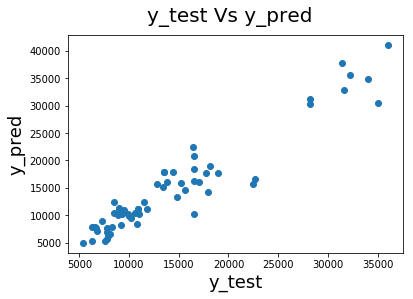

In [471]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test Vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=18)

In [477]:
# Training data R2 value
from sklearn.metrics import r2_score
print('Training data R2 =',r2_score(y_train, y_train_pred))
# Test data R2 value
print('Test data R2 =',r2_score(y_test, y_test_pred))

Training data R2 = 0.925908651559439
Test data R2 = 0.8849882539937808


So Training data R2 > Test data R2 and Test data R2 is not too much less than train data R2. So our model is good

In [478]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test,y_test_pred))
print('Train RMSE is ',train_rmse)
print('Test RMSE is',test_rmse)

Train RMSE is  2157.066242083328
Test RMSE is 2702.0207398672924


Eventhough Test RMSE is greater than Train RMSE, but it is near to the range of it. So our model is good.

# Let's plot q-q plot to identify the fit

In [494]:
# Calculating Test Error
test_error=y_test-y_test_pred
train_error = y_train-y_train_pred

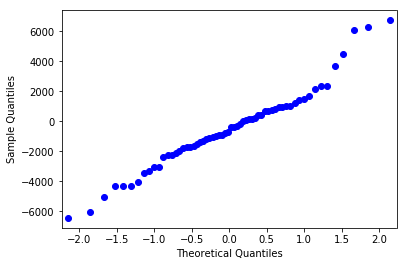

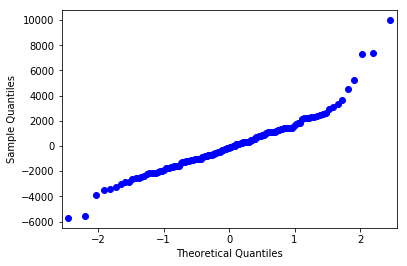

In [499]:
import statsmodels.api as sm
import pylab
sm.qqplot(test_error)
sm.qqplot(train_error)
pylab.show()

So our q-q plot for train_error and test_error is almost linear. So it satisfy our assumption

# So, our final coefficients affecting price of the car are:

- enginelocation -->9283.1906
- wheelbase -->1.01e+04
- horsepower	1.609e+04
- CarName_audi	2554.5478
- CarName_bmw	  9569.2012
- CarName_buick	1.355e+04
- CarName_dodge	-2075.8950
- CarName_jaguar	1.159e+04
- CarName_mitsubishi	-2387.95
- CarName_porsche	6848.9212
- CarName_toyota	-1113.9815
- enginetype_ohcf	-1528.0766

Interpretation:
    - One unit increase in enginelocation variable will increase the price of car by 9283 times
    - One unit increase in wheelbase variable will increase price of the car by 1.01e+04 times
    - One unit increase in CarName_dodge  variable will decrease price of the car by -2075 times
    - One unit increase in CarName_mitsubishi  variable will decrease price of the car by -2387 times and so on.
- Here coefficients are seems to be very heigh, it can be reduced by using regularization techniques.    

From the above coefficients it is clear that CarName which means Brand of the car plays an important role in deciding the price and followed by other variables like engine location, wheel base, horse power and engine type